## Autor
Elmer Hernan Barquero Chaves

In [149]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Situacion
Un plato cuadrado con lados unitarios y bordes fijos (Son nodos), se encuentra en el plano xy y se le da una vibracion transversal

La ecuacion a resolver
### $ \frac{d^{2} z}{d t^{2}} = \alpha ( \frac{\partial^{2} z}{\partial x^{2}} + \frac{\partial^{2} z}{\partial y^{2}})$ 

$\alpha$: la rapidez de la onda, tambien se puede escribir como: $\frac{F}{\sigma_m}$ con F la tension de la placa y $\sigma_m$ la densidad de area

La solucion analitica del problema es:

### $z = \sum_{m=1}^{\infty}\sum_{n=1}^{\infty} [ A_{mn} cos(\lambda_{mn} \alpha t) + B_{mn} sen(\lambda_{mn} \alpha t) ] sen(m \pi x) sen(n \pi y)  $

#### $ A_{mn} = 4 \int_{0}^{1} \int_{0}^{1} f(x,y) sen(m \pi x) sen(n \pi y) dxdy $

#### $ B_{mn} = \frac{4}{\alpha \lambda_{mn}} \int_{0}^{1} \int_{0}^{1} g(x,y) sen(m \pi x) sen(n \pi y) dxdy $

#### $\lambda_{mn} = \pi \sqrt{m^2 + n^2}$

Donde $f(x,y)$ es la forma inicial de la placa y $g(x,y)$ la velocidad inicial

## Condiciones iniciales

In [150]:
# Definir f(x, y) y g(x, y)

def f(x, y):

    # Se quiere que la tela tenga forma de cono al inicio, como si fuera jalada desde el centro

    # Parámetros del cono
    C = 0.5  # Altura máxima en el centro
    r_max = 1 / 2  # Distancia máxima desde el centro de la superficie
    
    # Coordenadas del centro
    x_center, y_center = 0.5, 0.5
    
    # Distancia radial desde el centro
    r = np.sqrt((x - x_center)**2 + (y - y_center)**2)
    
    # Definir la función del cascarón de cono
    return C * (1 - r / r_max)


def g(x, y):
    # Ejemplo: velocidad inicial de la placa (puede modificarse según el problema)
    return 0

alpha = 1

grafica1 = 'Cono' # Grafica 3D de un momento especifico
grafica2 = 'Cono' # Gif de la onda


## Generacion de los parametros

In [151]:
from scipy.integrate import dblquad

# Función para calcular lambda_mn
def lambbdamn(m, n):
    return np.pi * np.sqrt(m**2 + n**2)

# Función para calcular A_mn
def A_mn(m, n):
    integrand = lambda y, x: f(x, y) * np.sin(m * np.pi * x) * np.sin(n * np.pi * y)
    result, error = dblquad(integrand, 0, 1, lambda x: 0, lambda x: 1)
    return 4 * result  # Factor de 4 por la fórmula

# Función para calcular B_mn
def B_mn(m, n):
    lambda_mn = lambbdamn(m, n)
    integrand = lambda y, x: g(x, y) * np.sin(m * np.pi * x) * np.sin(n * np.pi * y)
    result, error = dblquad(integrand, 0, 1, lambda x: 0, lambda x: 1)
    return (4 / (alpha * lambda_mn)) * result  # Factor 4 y división por lambda_mn

## Solucion

In [152]:
# Definir el número máximo de n y m
nn = 10  # número máximo de n y m

A = np.zeros((nn, nn))  # Inicializar matriz A
B = np.zeros((nn, nn))  # Inicializar matriz B

for m in range(1,nn):
    for n in range(1,nn):
        A[m-1, n-1] = A_mn(m, n)
        B[m-1, n-1] = B_mn(m, n)


In [153]:
# Crear malla de puntos para los valores de z en cada (t,x,y)

k = 100 # Resolucion

t_vals = np.linspace(0, 5, k)
x_vals = np.linspace(0, 1, k)
y_vals = np.linspace(0, 1, k)

X , Y = np.meshgrid(x_vals,y_vals)

# Longitud de onda de cada armonico
m = np.arange(1, nn + 1)
n = np.arange(1, nn + 1)
mn_m , mn_n = np.meshgrid(m,n)
Ll = lambbdamn(mn_m,mn_n)




In [154]:
# Inicializar z(t, x, y) como una matriz 3D: (len(t_vals), k, k)
z = np.zeros((len(t_vals), k, k))

# Bucle sobre el tiempo y la suma doble infinita truncada (nn términos)
for t_idx, t in enumerate(t_vals):
    z_t = np.zeros((k, k))  # Matriz temporal para cada t
    for i in range(nn):  # Suma sobre m
        for j in range(nn):  # Suma sobre n
            # Parte temporal de la serie armónica
            temporal_part = (A[i][j] * np.cos(Ll[i][j] * alpha * t) + 
                             B[i][j] * np.sin(Ll[i][j] * alpha * t))
            # Parte espacial de la serie armónica
            spatial_part = np.sin((i + 1) * np.pi * X) * np.sin((j + 1) * np.pi * Y)
            # Sumar contribución al valor de z en el tiempo t
            z_t += temporal_part * spatial_part
    
    # Guardar los valores de z para el tiempo t en la matriz 3D
    z[t_idx] = z_t

Text(0.5, 1.0, 'Distribución de z para t = 5.0')

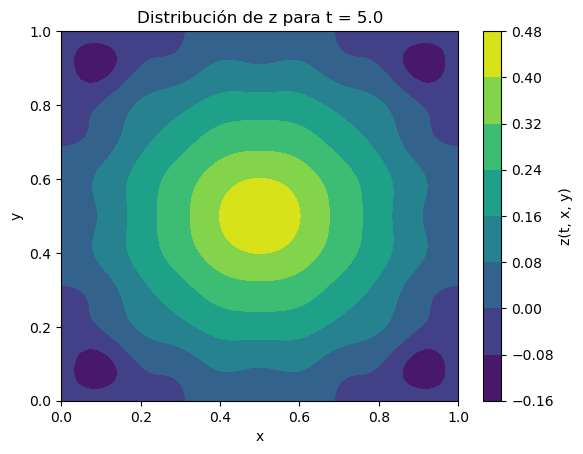

In [155]:
# Graficar el resultado
plt.contourf(X, Y, z[0], cmap='viridis')
plt.colorbar(label="z(t, x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Distribución de z para t = {t}")

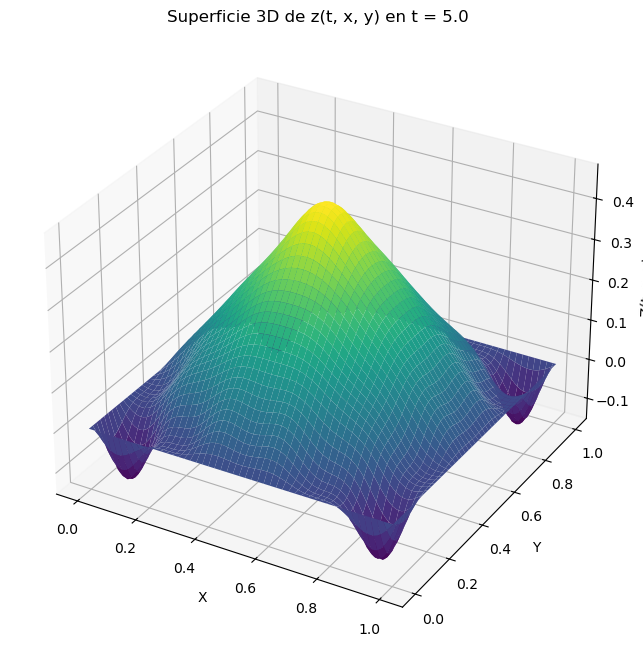

In [156]:
from mpl_toolkits.mplot3d import Axes3D

# Graficar el resultado en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear la superficie 3D
ax.plot_surface(X, Y, z[0], cmap='viridis')

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z(t, x, y)')
ax.set_title(f'Superficie 3D de z(t, x, y) en t = {t}')
plt.savefig(f"{grafica1}.png")

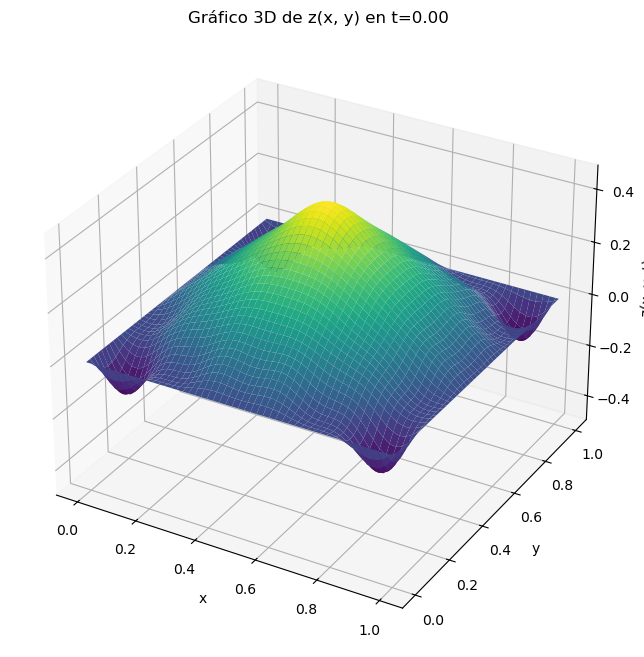

In [161]:
from matplotlib.animation import FuncAnimation

# Crear la figura y el eje de la gráfica 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Función de actualización para cada cuadro de la animación
def update(frame):
    # Limpiar el eje actual
    ax.cla()

    # Evaluar z en la malla de puntos para el tiempo t = frame
    Z = z[frame]  # Usar el índice correspondiente al tiempo
    
    # Crear una nueva superficie
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Configurar etiquetas y título
    ax.set_title(f'Gráfico 3D de z(x, y) en t={t_vals[frame]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z(x, y, t)')

    # Establecer límites de los ejes si es necesario
    ax.set_zlim(np.min(z), np.max(z))  # Ajusta según los valores esperados de z

    return surface,

# Crear la animación
ani = FuncAnimation(fig, update, frames=k, interval=50)

# Guardar la animación como un GIF
ani.save(f"{grafica2}.mp4", writer='ffmpeg')